In [1]:
from IPython.display import Image
from IPython.core.display import HTML
PATH = "images/"

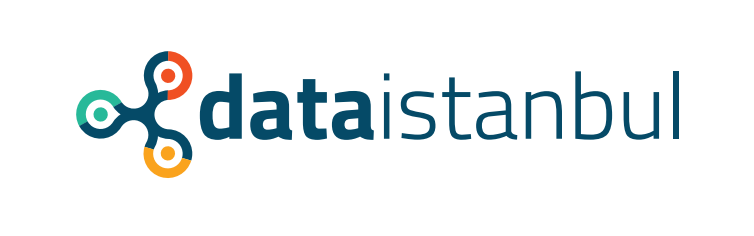

#### Recep BAYINDIR<br>
#### Birtuğ BİLGİN<br><br>
#### Makine Öğrenmesinin Temelleri 2019

# Yapay Sinir Ağları

### Yapay Sinir Ağları Nedir ?

### Modelin Sunulması


Girdi nitelikleri : $x_1,\dots,x_n$ <br><br>
$x_0$ girdi parametresi "yanlılık birimi"  olarak adlandırılır. Her zaman 1 olarak alınır. $x_0 = 1$ <br><br>
Ağırlıkları "theta" $\Theta$ olarak adlandırıyoruz.<br>

En basit hali ile bir yapay sinir ağının gösterimi: <br>

  
  $$\begin{bmatrix}x_0 \newline x_1 \newline x_2 \newline \end{bmatrix}\rightarrow\begin{bmatrix}\ \ \ \newline \end{bmatrix}\rightarrow h_\theta(x)$$

Yapay sinir ağları birden fazla katmandan oluşur. Girdi değişkenlerinin yer aldığı katmana "Girdi Katmanı", çıktıların bulunduğu katmana "Çıktı Katmanı"; girdi ve çıktı arasındaki katman veya katmanlara ise "Gizli Katman" denir.<br><br>
Gizli katmanlarda bulunan boğumlar "aktivasyon birimleri" olark adlandırılır ve $ \begin{equation*} a_0^2 ...  a_n^2  \end{equation*} $ şeklinde gösterilirler.


$$\begin{align*}& a_i^{(j)} = \text{ $j$ katmanındaki  $i$ dizinindeki "aktivasyon" birimi} \newline& \Theta^{(j)} = \text{ağırlık matrisi}\end{align*} $$ <br>

Yapay sinir ağımızın tek gizli katman ile oluştuğunu varsayarsak en sade hali ile aşağıdaki gibi gösterebiliriz.<br>


$$\begin{bmatrix}x_0 \newline x_1 \newline x_2 \newline x_3\end{bmatrix}\rightarrow\begin{bmatrix}a_1^{(2)} \newline a_2^{(2)} \newline a_3^{(2)} \newline \end{bmatrix}\rightarrow h_\theta(x)$$ <br>

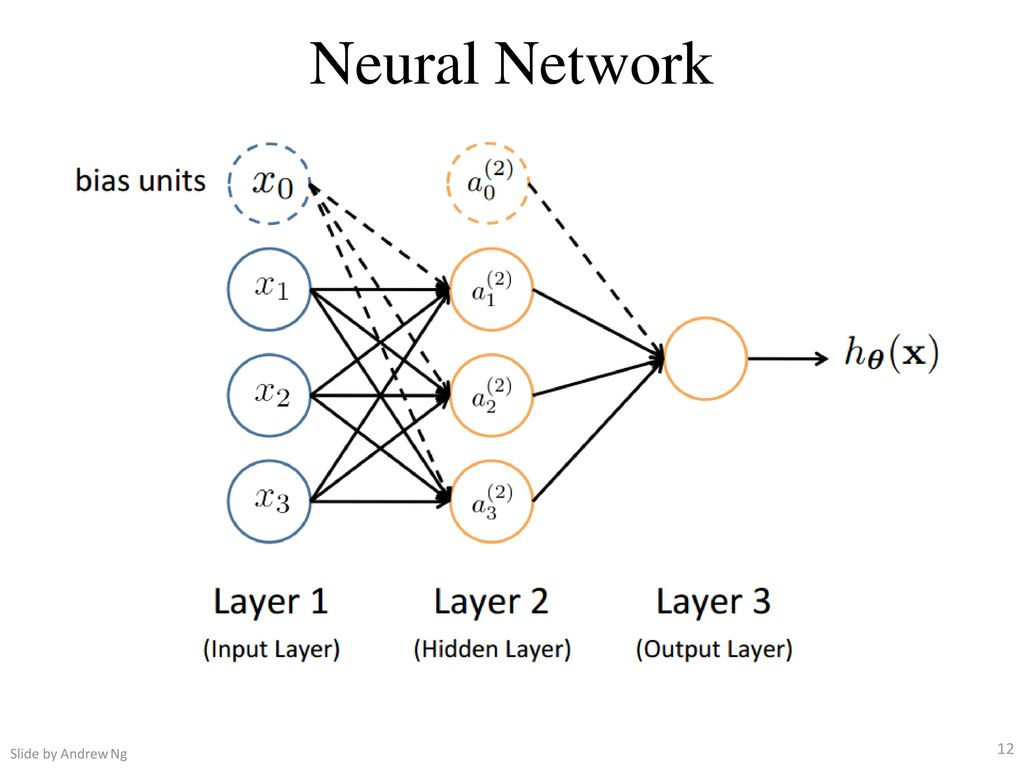

Her bir aktivasyon boğumunu elde etmek için kullanmamız gereken ifade aşağıdaki gibidir:<br><br>
$$\begin{align*} a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \newline \end{align*}$$



Bu ifade de görebileceğiniz gibi aktivasyon boğumlarımızı boyutu 3x4 olan parametre matrisi ile elde ettik.<br><br>
Her bir girdi parametresini ağırlığı ile çarparak topladıktan sonra seçtiğimiz aktivasyon fonksiyonunu bu toplama uygulayarak aktivasyon boğumunun değerini hesaplarız. Çıktı değerini belirleyecek hipotezimiz hesaplanan aktivasyon boğumlarının ikinci katmandaki ağırlık matrisi ile çarpımlarının toplamlarına aktivasyon fonksiyonu uygulayarak hesaplanır.<br><br>
Bu işlem her bir katman için tekrarlanır ve her katmanın kendi  $ \begin{equation*}\Theta^{(j)} \end{equation*} $  ağırlık matrisi vardır.<br><br>
Ağırlık matrisinin boyutlarını belirlerken eğer $j$ katmanı $s_j$ adet birime ve $j+1$ katmanı $s_{j+1}$ birime sahipse $\Theta^{(j)}$ ağırlık matrisinin boyutu $   s_{j+1} x (s_j+1)$ olacaktır.<br><br>
Tanımladığımız tek katmanlı ağda girdi katamanı 3 boğum içermekte ve gizli katman 3 boğum içermektedir. bu durumda ağırlık matrisimizin boyutları 3x4 olacaktır. Buradaki +1 değeri her katmana eklediğimiz yanlılık boğumundan kaynaklanmaktadır.

Başka bir örnek verecek olursak:<br>
    
   Yapay sinir ağımızın girdi katmanında 2 girdi boğumu, gizli katmanında ise 4 aktivasyon boğumu var ise bu iki katman arasındaki ağırlık matrisimiz $\Theta^{(1)}$'in boyutu  $s_{j+1} x (s_j + 1) = 4 x 3$ olacaktır.

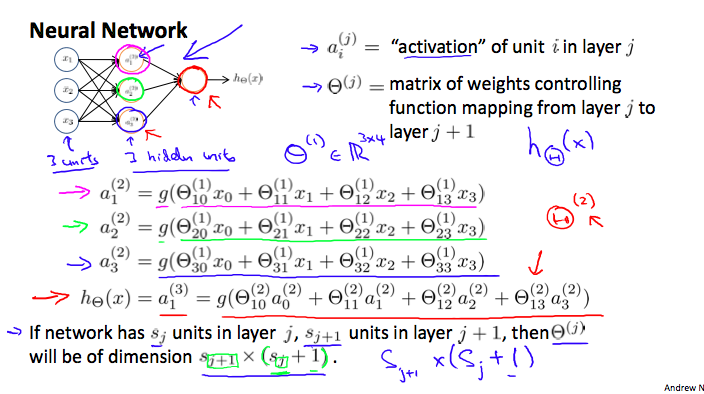

### Model Sunumu (Devam)


$$ \begin{align*} a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \newline \end{align*} $$ 


Hipotez gösterimini vektörleştirerek ifade edersek aktivasyon fonsiyonuna girdi olacak yeni $ z_k^{(j)}$
değişkenini tanımlamış oluruz.<br>
$$\begin{align*}& h_\theta (x) = g ( \theta^T x ) \newline \newline& z = \theta^T x \newline& g(z) = \dfrac{1}{1 + e^{-z}} \end{align*}$$ 

$$\begin{align*}a_1^{(2)} = g(z_1^{(2)}) \newline a_2^{(2)} = g(z_2^{(2)}) \newline a_3^{(2)} = g(z_3^{(2)}) \newline \end{align*}$$


Diğer bir ifade ile j = 2 katmanı ve k boğumu için z değişkeni aşağıdaki gibi olacaktır: 

$$z_k^{(2)} = \Theta_{k,0}^{(1)}x_0 + \Theta_{k,1}^{(1)}x_1 + \cdots + \Theta_{k,n}^{(1)}x_n$$

$x$ ve $z^j$ değişkenlerinin vektörleştirilmiş ifadesi :
$$\begin{align*}x = \begin{bmatrix}x_0 \newline x_1 \newline\cdots \newline x_n\end{bmatrix} &z^{(j)} = \begin{bmatrix}z_1^{(j)} \newline  z_2^{(j)} \newline\cdots \newline z_n^{(j)}\end{bmatrix}\end{align*}$$

Gizli katmanlar için $ x=a^{(1)}$ olarak kabul ederek ifademizi tekrar düzenlersek:<br>
$$z^{(j)} = \Theta^{(j-1)}a^{(j-1)}$$
 $$\begin{equation*} a^{(j)} = g(z^{(j)})\end{equation*}$$


Bu gösterimi sağladıktan sonra aktivasyon fonksiyonunu $z^{(j)}$ vektörüne eleman elemana uygulanabilir.
Her bir katmandaki boğumlar "$a^{(j)}$" hesaplanırken yanlılık birimini eklememiz gereklidir. Yani her katmandaki ilk eleman $ a_0^{(j)}$ 1'e eşit olacaktır.<br>

Hipotezin çıktı değerini hesaplarken son bir $z$ daha hesaplamamız gerekli:

$$z^{(j+1)} = \Theta^{(j)}a^{(j)}$$

Burada $\Theta^{(j)}$ ve $a^{(j)}$ eleman elemana çarpımından tek bir sayı elde edilir ve biz sonucu aşağıdaki gibi hesaplayabiliriz.

$$h_\Theta(x) = a^{(j+1)} = g(z^{(j+1)})$$



### Örnek ve Uygulaması

Basit bir örnek olarak $x_1$ "VE" $x_2$ ifadesini tahminleyen bir ağ oluşturalım. Önce kısaca "VE" mantık operatörünü hatırlayalım.

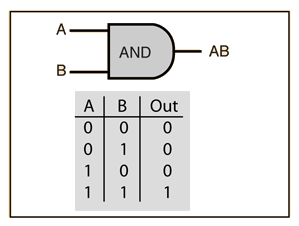

Oluşturacağımız sinir ağının basit bir gösterimi aşağıdaki gibidir:
    
$$\begin{align*}\begin{bmatrix}x_0 \newline x_1 \newline x_2\end{bmatrix} \rightarrow\begin{bmatrix}g(z^{(2)})\end{bmatrix} \rightarrow h_\Theta(x)\end{align*}$$

Buradaki $x_0$ değişkeni yanlılık değişkeni olarak eklenmiştir ve 1 olarak atanır.<br>
Aktivasyon fonksiyonu olarak sigmoid aktivasyon fonksiyonu kullanacağız.

Ağırlık matrisi:
$$\Theta^{(1)} =\begin{bmatrix}-30 & 20 & 20\end{bmatrix}$$

Hipoteziminiz matematiksel ifadesi:<br>

$$\begin{align*}& h_\Theta(x) = g(-30 + 20x_1 + 20x_2) \newline \newline & x_1 = 0 \ \ "ve" \ \ x_2 = 0 \ \ ise \ \ g(-30) \approx 0 \newline & x_1 = 0 \ \ "ve" \ \ x_2 = 1 \ \ ise \ \ g(-10) \approx 0 \newline & x_1 = 1 \ \ "ve" \ \ x_2 = 0 \ \ ise \ \ g(-10) \approx 0 \newline & x_1 = 1 \ \ "ve" \ \ x_2 = 1 \ \ ise \ \ g(10) \approx 1\end{align*}$$



In [1]:
import numpy as np
import math 


def sigmoid(x):
    return 1/(1+np.exp(-x))


In [2]:
thetas = np.array([np.array([-30,20,20]).reshape(1, -1)])

In [17]:
egitimVerisi = np.array([
                    [np.array([1,0,0]).reshape(1, -1), 0],
                    [np.array([1,0,1]).reshape(1, -1), 0],
                    [np.array([1,1,0]).reshape(1, -1), 0],
                    [np.array([1,1,1]).reshape(1, -1), 1],
                    ])

In [24]:

for iter in range(egitimVerisi.shape[0]):
#ileri yayilim algoritmasi:
        a1 = egitimVerisi[iter][0]
        z2 = np.dot(thetas,a1.reshape(-1, 1))
        a2 = sigmoid(z2)
        hypothesis_theta = a2
        print("Çıktı :",hypothesis_theta.round())
        


Çıktı : [[[0.]]]
Çıktı : [[[0.]]]
Çıktı : [[[0.]]]
Çıktı : [[[1.]]]


In [26]:
x = np.array([1,0,0])
z = np.dot(thetas,x.reshape(-1, 1))
a= sigmoid(z)
print(a.round()) 

x = np.array([1,0, 1])
z = np.dot(thetas,x.reshape(-1, 1))
a= sigmoid(z)
print(a.round()) 
 
x = np.array([1,1,0])
z = np.dot(thetas,x.reshape(-1, 1))
a= sigmoid(z)
print(a.round()) 

x = np.array([1,1,1])
z = np.dot(thetas,x.reshape(-1, 1))
a= sigmoid(z)
print(a.round()) 

[[[0.]]]
[[[0.]]]
[[[0.]]]
[[[1.]]]


### Çok Sınıflı Sınıflandırma

Veriyi birden fazla sınıfa sınıflandırabilmemiz için hipotez fonksiyonumuzun bir değerler vektörü döndürmesi gereklidir. Aşağıdaki resimde de gösterildiği gibi biz verimizi dört sınıfa sınıflandırmak istiyoruz. 

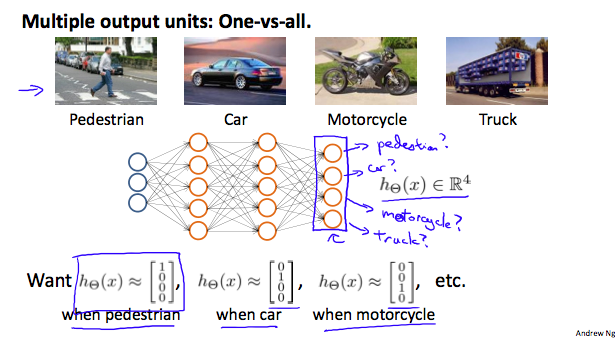

Çıktı vektörü olarak y dört sınıfa ait vektörü: <br>
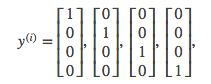

İfadedeki her bir $y^{(i)}$  görselin araba, yaya, kamyon ve ya motorsiklet sınıflarından birini ifade eder.
Ara katmanlardaki her biri  hipotez fonksiyonumuza yeni bilgiler ekleyerek bizi sonuca götürür.<br>
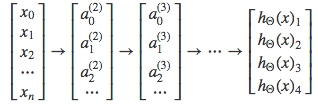

Hipotez sonucuna bir örnek olarak :

$$h_\Theta(x) =\begin{bmatrix}0 \newline 0 \newline 1 \newline 0 \newline\end{bmatrix}$$

Bu duruma göre görselin motorsiklet sınıfına  $h_\Theta(x)$ = 3 ait olduğunu söyleyebiliriz.

### Bedel Fonksiyonu 

Öncelikle bedel fonksiyonunu hesaplayabilmemiz için gerekli değişkenleri tanımlayalım.
* L = Tasarladığımız ağın katman sayısı <br>
* $s_l =$ her bir $l$ katmanın sahip olduğu boğum sayısı (yanlılık değişkenini dahil etmiyoruz) <br>
* K = çıktı katmanındaki boğum sayısı / sınıf sayısı<br>

Çok sınıflı bir model düşünürsek  $h_{Θ}(x)_k$ sonuç hipotezimizin $k^{th}$ çıktı üretmesini bekleriz. Yapay sinir ağlarında kullanacağım bedel fonksiyonu logistic regresyonun kullanılan bedel fonksiyonunun genelleştirilmiş halidir. Logistic regresyon bedel fonsiyonunu hatırlayacak olursak :
    
   $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
   

Sinir ağları için kullanacağımız bedel fonksiyonu:

$$\begin{gather*} J(\Theta) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K \left[y^{(i)}_k \log ((h_\Theta (x^{(i)}))_k) + (1 - y^{(i)}_k)\log (1 - (h_\Theta(x^{(i)}))_k)\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}} ( \Theta_{j,i}^{(l)})^2\end{gather*}$$

Birden fazla sınıflandırma yapabilmek için bir kaç iç içe toplama işlemi ekledik.

Bedel fonksiyonunun düzenleştirme kısmında birden fazla ağırlık matrisini hesaplamamız gerekli. Burada her bir katman için bulunduğumuz katmandaki boğum sayısı (yanlılık birimi dahil) ve bir sonraki katmandaki boğum sayısı (yanlılık birimini dahil etmeden) boyutlarında bir ağırlık matrisini hesaplarız. Burada i indisi katman içerisindeki boğumu ifade eder.

In [28]:
from scipy.io import loadmat ## mat dosyasını okumayabilmek için gerekli
import numpy as np
import scipy.optimize as opt
import pandas as pd


In [29]:
girdi_katmani_boyutu  = 400
ara_katman_boyutu = 25
etiket_sayisi = 10

In [10]:

# verinin okunması

veri = loadmat('data/ex3data1.mat')

X = veri['X']
y = veri['y']

mat2=loadmat("data/ex3weights.mat")

Theta1=mat2["Theta1"] # Theta1 boyutu 25 x 401  hidden layer 25 boğuma sahip
Theta2=mat2["Theta2"] # Theta2 boyutu 10 x 26 output olarak 10 sınıf ve hidden layer da 25+1 bias ile 26 boğum 

In [11]:
## sigmoid fonksiyonunun tanımlanması

def sigmoid(z):    
    return 1/ (1 + np.exp(-z))

In [12]:
def ysaBedelFonk(nn_params, girdi_katmani_boyutu, ara_katman_boyutu, etiket_sayisi, X, y, Lambda):

    theta1 = nn_params[:((girdi_katmani_boyutu+1)*ara_katman_boyutu)].reshape(ara_katman_boyutu,girdi_katmani_boyutu+1)
    theta2 = nn_params[((girdi_katmani_boyutu +1)*ara_katman_boyutu ):].reshape(etiket_sayisi,ara_katman_boyutu+1)
                  
    m = len(y) # 5000
    birler = np.ones((m,1))
    a1 = np.hstack((birler, X))
    a2 = sigmoid(a1 @ theta1.T)
    a2 = np.hstack((birler, a2))
    h = sigmoid(a2 @ theta2.T)
    
    y_d = pd.get_dummies(y.flatten())
    
    temp1 = np.multiply(y_d, np.log(h))
    temp2 = np.multiply(1-y_d, np.log(1-h))
    temp3 = np.sum(temp1 + temp2)
    
    toplam1 = np.sum(np.sum(np.power(theta1[:,1:],2), axis = 1))
    toplam2 = np.sum(np.sum(np.power(theta2[:,1:],2), axis = 1))
    
    return np.sum(temp3 / (-m)) + (toplam1 + toplam2) * Lambda / (2*m)


In [13]:

nn_params = np.append(Theta1.flatten(),Theta2.flatten())

J= ysaBedelFonk(nn_params, girdi_katmani_boyutu, ara_katman_boyutu, etiket_sayisi, X, y, 0)
reg_J = ysaBedelFonk(nn_params, girdi_katmani_boyutu, ara_katman_boyutu, etiket_sayisi, X, y, 1)

print("Bedel değeri (regülarize edilmemiş):",J,"\nBedel değeri (regülarize edilmiş):",reg_J)

Bedel değeri (regülarize edilmemiş): 0.28762916516131876 
Bedel değeri (regülarize edilmiş): 0.3837698590909235


### Geri Yayılım Algoritması
 Geri yayılım algoritması bedel fonksiyonun minimizaysonu için kullanır. Logistic regresyon ve doğrusal regresyon için kullanılan dereceli azalma algoritması gibi kullanılır.<br><br>
 Amacımız $\min_\Theta J(\Theta)$ hesaplanmasıdır.<br><br>
 En uygun theta parametrelerini kullanarak bedel fonksiyonumuz $J$'yi minimize etmek istiyoruz. Bunun için  $J(Θ)$ fonksiyonunun kısmi turevini hesaplamamız gerekli: <br>
 $$\dfrac{\partial}{\partial \Theta_{i,j}^{(l)}}J(\Theta)$$ <br>

Bunun için uygulamamız gereken algoritma:
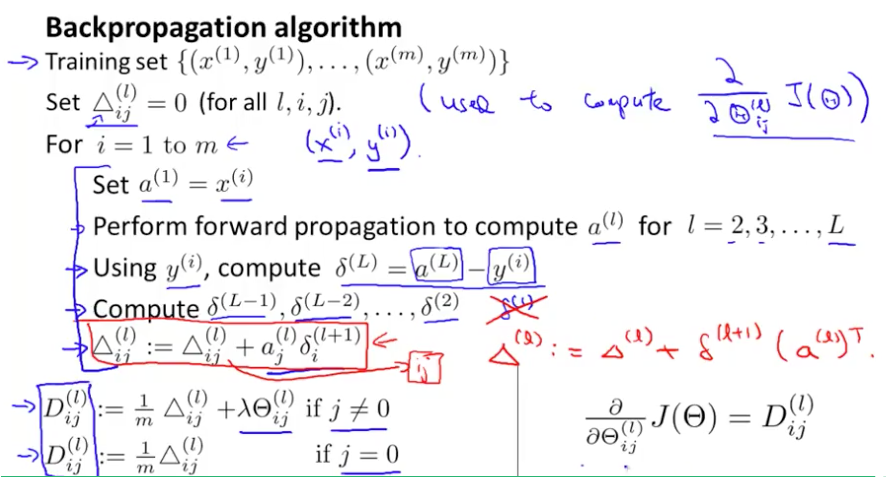

### Geri Yayılım Algoritması
Verilen veri seti ${(x(1),y(1))⋯(x(m),y(m))}$ <br>
Tüm (l,i,j) için $\Delta^{(l)}_{i,j}$:= 0 oluştur <br><br>
Tüm eğitim örnekleri için t=1:m:<br>
1. $a^{(1)}$ := $x^{(t)}$ atamasını gerçekleştir<br>
2. ileri besleme algoritmasını kullanarak  $a^{(l)}$ for l=2,3,…,L hesaplarız<br>

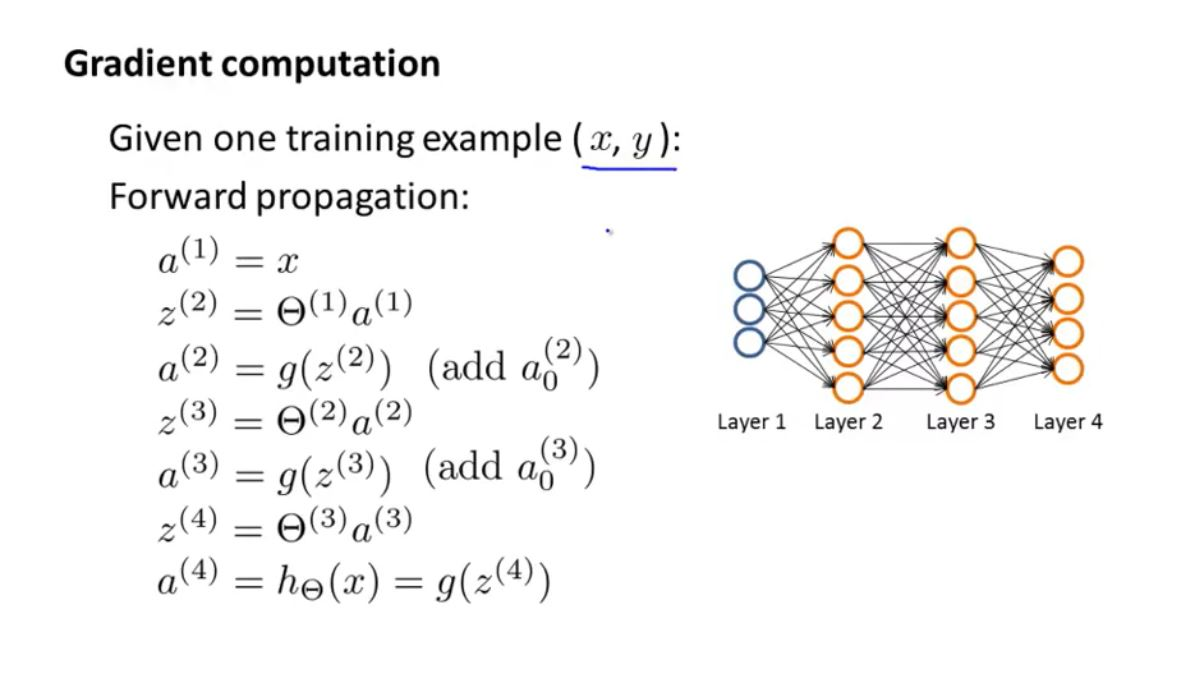

In [ ]:
  for i in range(X.shape[0]):
        birler = np.ones(1)
        a1m = np.hstack((birler, X[i]))
        z2 = a1 @ initial_theta1.T
        a2 = np.hstack((birler, sigmoid(z2)))
        z3 = a2 @ initial_theta2.T
        a3 = sigmoid(z3)

3. $y^{(t)}$ kullanılarak $\delta^{(L)} = a^{(L)} - y^{(t)}$ hesaplanır. <br>

Burada L sinir ağının sahip olduğu katman sayısıdır ve $a^{(L)}$ son katmandaki aktivasyon birimlerin vektorize edilmiş çıktılarıdır. Son katmandaki sonuçlar ile gerçek değerlerin farkından hata değerini hesaplarız. Daha sonrasında aynı işlemi sağdan sola doğru (çıktı katmanından girdi katmanına doğru) ilerleyerek delta değerleri hesaplanır.

4. Aşağıdaki ifadeyi kullanarak $\delta^{(L-1)}$, $\delta^{(L-2)},\dots,\delta^{(2)}$ hesaplanması:<br>

$$\delta^{(l)} = ((\Theta^{(l)})^T \delta^{(l+1)})\ .*\ a^{(l)}\ .*\ (1 - a^{(l)})$$<br>
burada $a^{(l)}\ .*\ (1 - a^{(l)})$ sigmoid fonksiyonunun türevidir.

L katmanının delta değeri bir sonraki katmanın delta değerinin bu katmandaki theta matrisi ile çarpımından elde edilir. Daha sonra bu çarpım eleman elemana sigmoid aktivasyon fonksiyonunun türevi ile çarpılır.

Sigmoid fonksiyonunun türevi aşağıdaki gibi ifade edilebilir:<br>
 $$ g'(z) = g(z)(1 - g(z))$$

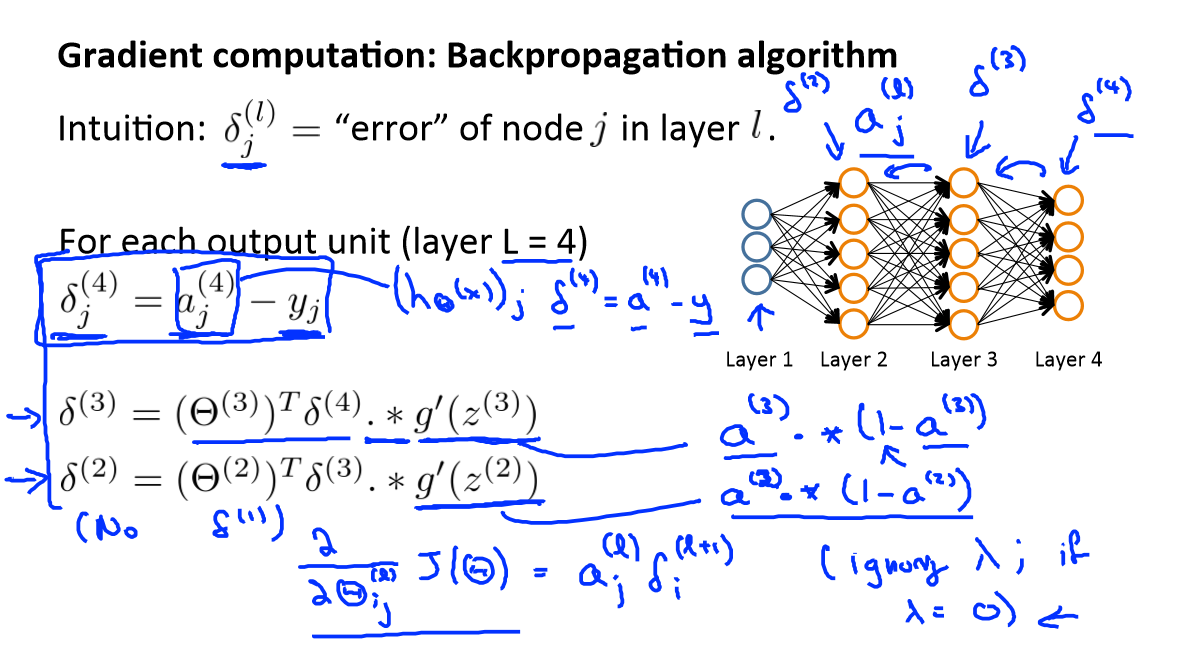

5. Deltanın güncellemesi $\Delta^{(l)}_{i,j} := \Delta^{(l)}_{i,j} + a_j^{(l)} \delta_i^{(l+1)}$  veya vektorize edilmiş hali  $\Delta^{(l)} := \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^T$ ile hesaplanarak yeni bir  $\Delta$  matrisi elde edilir.<br>
$D^{(l)}_{i,j} := \dfrac{1}{m}\left(\Delta^{(l)}_{i,j} + \lambda\Theta^{(l)}_{i,j}\right)$, if j≠0. <br>
$D^{(l)}_{i,j} := \dfrac{1}{m}\Delta^{(l)}_{i,j}$,  If j=0

Burada büyük delta $D$ bir biriktirici olarak davranır ve hesaplanan hata değerleri ile bedel fonksiyonunun kısmi türevini hesaplamamızı sağlar.<br> $$\frac \partial {\partial \Theta_{ij}^{(l)}} J(\Theta)= D_{ij}^{(l)}$$



###  Geri Yayılım Algoritmasının Uygulanması

In [14]:
def sigmoidDereceli(z):
    
    sigmoid = 1/(1 + np.exp(-z))
    
    return sigmoid *(1-sigmoid)

In [19]:
def nnGeriYayilim(nn_params, girdi_katmani_boyutu, ara_katman_boyutu, etiket_sayisi, X, y, lmbda):
    
    baslangic_theta1 = np.reshape(nn_params[:ara_katman_boyutu*(girdi_katmani_boyutu+1)], (ara_katman_boyutu, girdi_katmani_boyutu+1), 'F')
    baslangic_theta2 = np.reshape(nn_params[ara_katman_boyutu*(girdi_katmani_boyutu+1):], (etiket_sayisi, ara_katman_boyutu+1), 'F')
  
    y_d = pd.get_dummies(y.flatten())
    delta1 = np.zeros(baslangic_theta1.shape)
    delta2 = np.zeros(baslangic_theta2.shape)
    m = len(y)
    
    for i in range(X.shape[0]):
        birler = np.ones(1)
        a1 = np.hstack((birler, X[i]))
        z2 = a1 @ baslangic_theta1.T
        a2 = np.hstack((birler, sigmoid(z2)))
        z3 = a2 @ baslangic_theta2.T
        a3 = sigmoid(z3)
        d3 = a3 - y_d.iloc[i,:][np.newaxis,:]
        z2 = np.hstack((birler, z2))
        d2 = np.multiply(baslangic_theta2.T @ d3.T, sigmoidDereceli(z2).T[:,np.newaxis])
        delta1 = delta1 + d2[1:,:] @ a1[np.newaxis,:]
        delta2 = delta2 + d3.T @ a2[np.newaxis,:]
        
    delta1 /= m
    delta2 /= m
    delta1[:,1:] = delta1[:,1:] + baslangic_theta1[:,1:] * lmbda / m
    delta2[:,1:] = delta2[:,1:] + baslangic_theta2[:,1:] * lmbda / m
    
    return np.hstack((delta1.ravel(order='F'), delta2.ravel(order='F')))

In [16]:
def rasgeleBaslangicAgirliklari(L_in, L_out):
    epsilon = 0.12
    return np.random.rand(L_out, L_in+1) * 2 * epsilon - epsilon


from scipy.io import loadmat ## mat dosyasını okumayabilmek için gerekli
import numpy as np
# verinin okunması

veri = loadmat('data/ex3data1.mat')

X = veri['X']
y = veri['y']

## sigmoid fonksiyonunun tanımlanması

def sigmoid(z):    
    return 1/ (1 + np.exp(-z))

In [20]:
girdi_katmani_boyutu  = 400
ara_katman_boyutu = 25
etiket_sayisi = 10

baslangic_theta1 = rasgeleBaslangicAgirliklari(girdi_katmani_boyutu, ara_katman_boyutu)
baslangic_theta2 = rasgeleBaslangicAgirliklari(ara_katman_boyutu, etiket_sayisi)

nn_baslangic_params = np.hstack((baslangic_theta1.ravel(order='F'), baslangic_theta2.ravel(order='F')))

nn_geriyayilim_Params = nnGeriYayilim(nn_baslangic_params, girdi_katmani_boyutu, ara_katman_boyutu, etiket_sayisi, X, y, 1)

print(nn_geriyayilim_Params)

[-0.0143269   0.0078278  -0.02692945 ...  0.23440896  0.23714749
  0.18182695]


## Dereceli Kontrol

### Dereceli kontrole Neden ihyiyacımız var?

Geri yayılım algoritması hesaplanmasın bir çok detaya sahip oluğu için uygulanması zor bir algoritmadır. Bu nedenden dolayı uygulanması sırasında açık çıkma ihtimali yüksektir. Bu yüzden algoritmanın doğru uygulandığının kontrolü için dereceli kontrol yöntemi kullanılır.

Dereceli kontrol yöntemi geri yayılım algoritmasının istenildiği gibi çalıştığını doğrulayacaktır. 
Bunu bedel fonksiyonunun türevini alarak bunu kontrol edebiliriz:<br>

$$\dfrac{\partial}{\partial\Theta}J(\Theta) \approx \dfrac{J(\Theta + \epsilon) - J(\Theta - \epsilon)}{2\epsilon}$$

Birden fazla theta matrisi ile türevin yaklaşık sonucunu  $\Theta_j$ için aşağıdaki ifade ile bulabiliriz:<br>

$$\dfrac{\partial}{\partial\Theta_j}J(\Theta) \approx \dfrac{J(\Theta_1, \dots, \Theta_j + \epsilon, \dots, \Theta_n) - J(\Theta_1, \dots, \Theta_j - \epsilon, \dots, \Theta_n)}{2\epsilon}$$

Kullanılan $\epsilon$ değeri için  ${\epsilon = 10^{-4}}$ gibi küçük bir değer atayarak matematiksel ifadenin düzgün çalışması sağlanılabilir. Eğer seçilen $\epsilon$ değeri çok küçük ise sayısal bir probleme dönüşür.

Burada geri yayılım algoritmasının sonuçları ile dereceli kontrol yöntemi ile elede ettiğimiz değerler karşılaştırılarak aradaki fark incelenir. Eğer fark $10^{-7}$ gibi çok küçük bir sayı ise uygulamamızın doğru olduğunu söyleyebiliriz.

Dereceli kontrol yöntemi sadece model kontrol edilirken kullanılmalıdır. Model canlı sistemde çalışırken kullanılmasına gerek yoktur. Eğer kullanılırsa modeli yavaşlatacaktır.


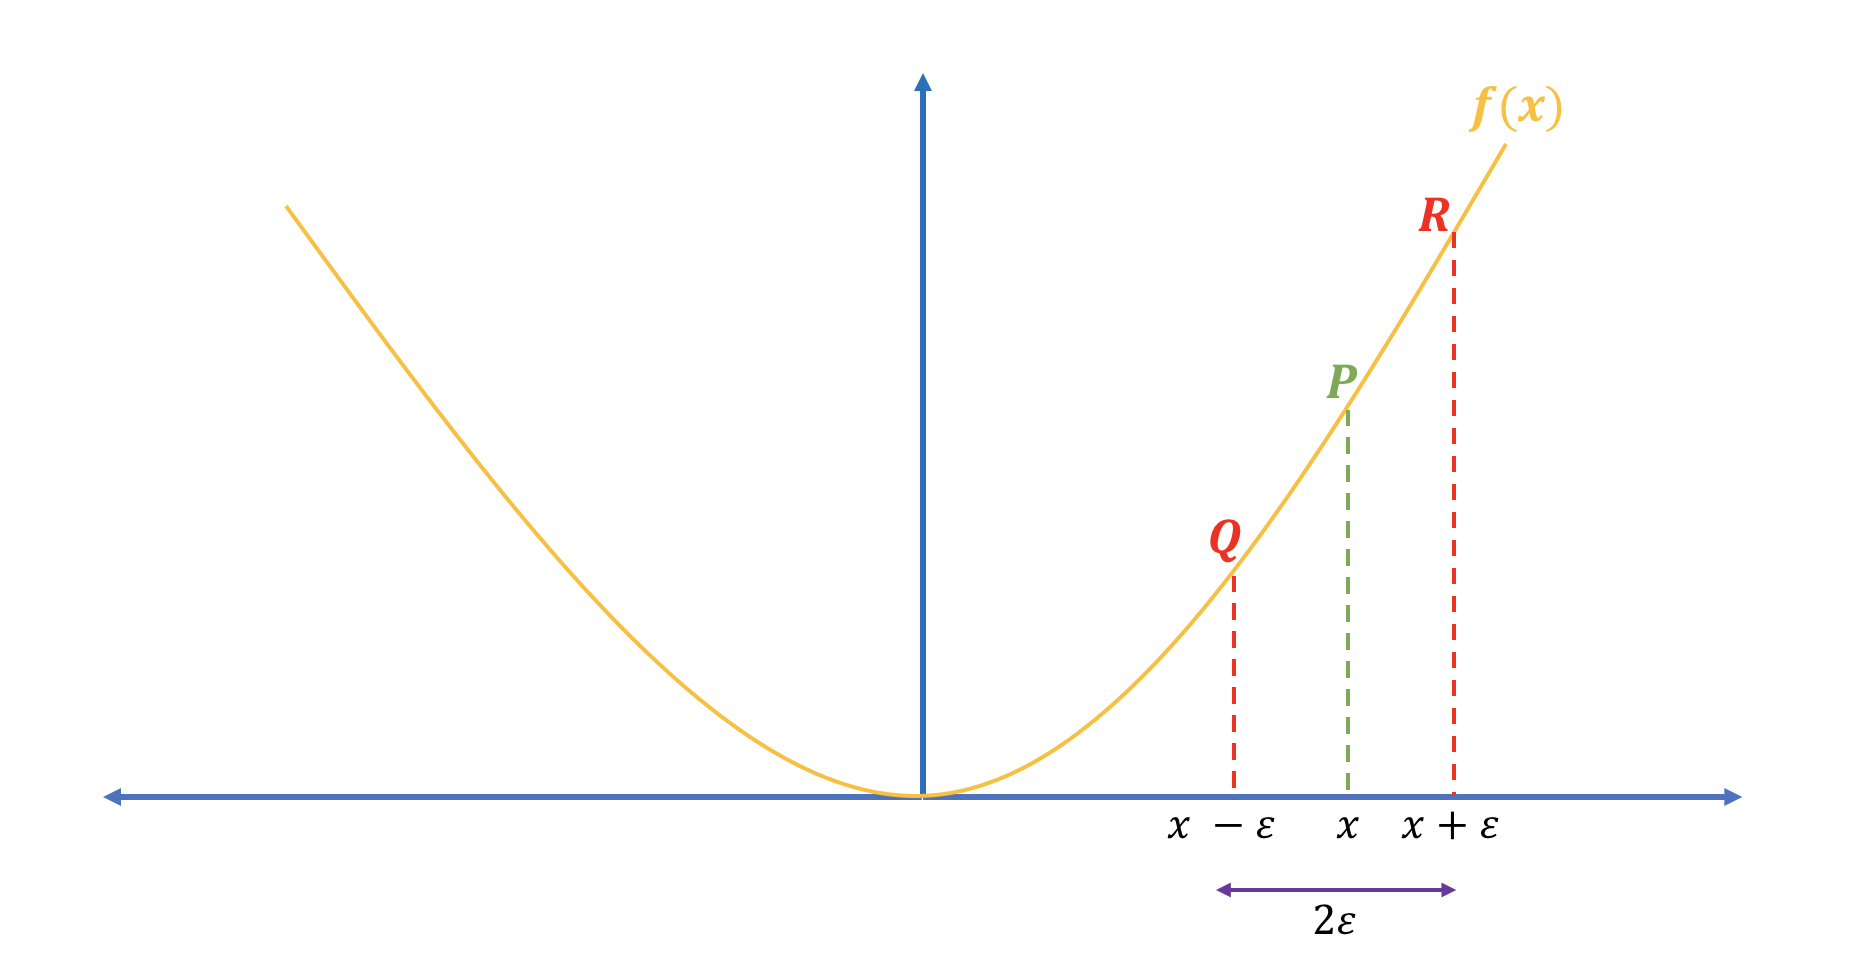

#### Dereceli Konrolün Uygulanması

In [30]:
def dereceliKontrol(nn_baslangic_params,nn_geriyayilim_Params,girdi_katmani_boyutu, ara_katman_boyutu, etiket_sayisi,myX,myy,mylambda=0.):
    eps = 0.0001
    flattened = nn_baslangic_params
    flattenedDs = nn_geriyayilim_Params
    n_elems = len(flattened) 
    # Veri setinden rasgele seçilim ile numerical gradient hesaplanır ver D ile karşılaştırılır
    for i in range(10):
        x = int(np.random.rand()*n_elems)
        epsvec = np.zeros((n_elems,1))
        epsvec[x] = eps

        bedel_yuksek = ysaBedelFonk(flattened + epsvec.flatten(),girdi_katmani_boyutu, ara_katman_boyutu, etiket_sayisi,myX,myy,mylambda)
        bedel_alcak  = ysaBedelFonk(flattened - epsvec.flatten(),girdi_katmani_boyutu, ara_katman_boyutu, etiket_sayisi,myX,myy,mylambda)
       
        kontrolDereceli = (bedel_yuksek - bedel_alcak) / float(2*eps)
        
        print("Eleman: {0}. Dereceli Kontrol = {1:.9f}. Geri Yayılım Gradient = {2:.9f}.".format(x,kontrolDereceli,flattenedDs[x]))


### Başlangıç Ağırlıklarının Rastgele Belirlenmesi

Theta ağırlıklarının başlangıçta sıfır olarak alınması geri yayılım algoritması çalıştırıldığında tüm boğumların aynı değeri almasına neden olacaktır. Başlangıç ağırlıklarını rastgele atayarak $\Theta$ matrisi oluşturulabilir.<br>
Her bir $\Theta_{ij}^{(l)}$ değerini rastgele olarak $[−ϵ,ϵ]$ arasından seçebiliriz.  

Elimizdeki theta matrislerini Theta1 10x11, Theta2  10x11 ve Theta3 1x11 boyutlarında düşünürsek. Hesaplamak için aşağıdaki ifadeleri kullanabiliriz.

Theta1 = rand(10,11) * (2 * EPSILON) - EPSILON;<br>
Theta2 = rand(10,11) * (2 * EPSILON) - EPSILON;<br>
Theta3 = rand(1,11) * (2 * EPSILON) - EPSILON;<br>

In [22]:
import numpy as np

def  randBaslangicAgirliklari(L_in, L_out):
    epsilon = 0.12
    return np.random.rand(L_out, L_in+1) * 2 * epsilon - epsilon

girdi_katmani_boyutu  = 400
ara_katman_boyutu = 25
etiket_sayisi = 10

baslangic_Theta1 = randBaslangicAgirliklari(girdi_katmani_boyutu, ara_katman_boyutu)
baslangic_Theta2 = randBaslangicAgirliklari(ara_katman_boyutu, etiket_sayisi)

baslangic_nn_params = np.append(baslangic_Theta1.flatten(),baslangic_Theta2.flatten())


In [23]:
print(baslangic_nn_params)

[-0.11185819  0.00159918  0.00760774 ... -0.00421309 -0.09498261
 -0.07205813]
